In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

The 5 stages include:

1. Normalizing the image prior to description.
2. Computing gradients in both the x and y directions.
3. Obtaining weighted votes in spatial and orientation cells.
4. Contrast normalizing overlapping spatial cells.
5. Collecting all Histograms of Oriented gradients to form the final feature vector.

### 1. Normalizing the image prior to description.

- **Gamma/power law normalization**: In this case, we take the \log(p) of each pixel p in the input image. However, as Dalal and Triggs demonstrated, this approach is perhaps an “over-correction” and hurts performance.  


- **Square-root normalization**: Here, we take the \sqrt(p) of each pixel p in the input image. By definition, square-root normalization compresses the input pixel intensities far less than gamma normalization. And again, as Dalal and Triggs demonstrated, square-root normalization actually increases accuracy rather than hurts it.  


- **Variance normalization**: A slightly less used form of normalization is variance normalization. Here, we compute both the mean \mu and standard deviation \sigma of the input image. All pixels are mean centered by subtracting the mean from the pixel intensity, and then normalized through dividing by the standard deviation: p' = (p - \mu) / \sigma. Dalal and Triggs do not report accuracy on variance normalization; however, it is a form of normalization that I like to perform and thought it was worth including.

(360, 480, 3)


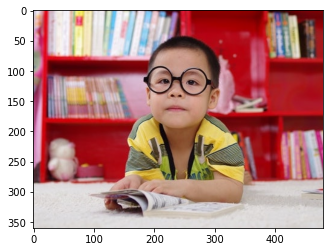

In [29]:
image = cv2.imread('./data/images/boy.jpg')
print(image.shape)
plt.imshow(image[:,:,::-1])
plt.show()

In [30]:
# Apply sobel filter along x direction
sobelx = cv2.Sobel(image, cv2.CV_32F, 1, 0)

# Apply sobel filter along y direction
sobely = cv2.Sobel(image,cv2.CV_32F, 0, 1)

Text(0.5, 1.0, 'Sobel Y Gradients')

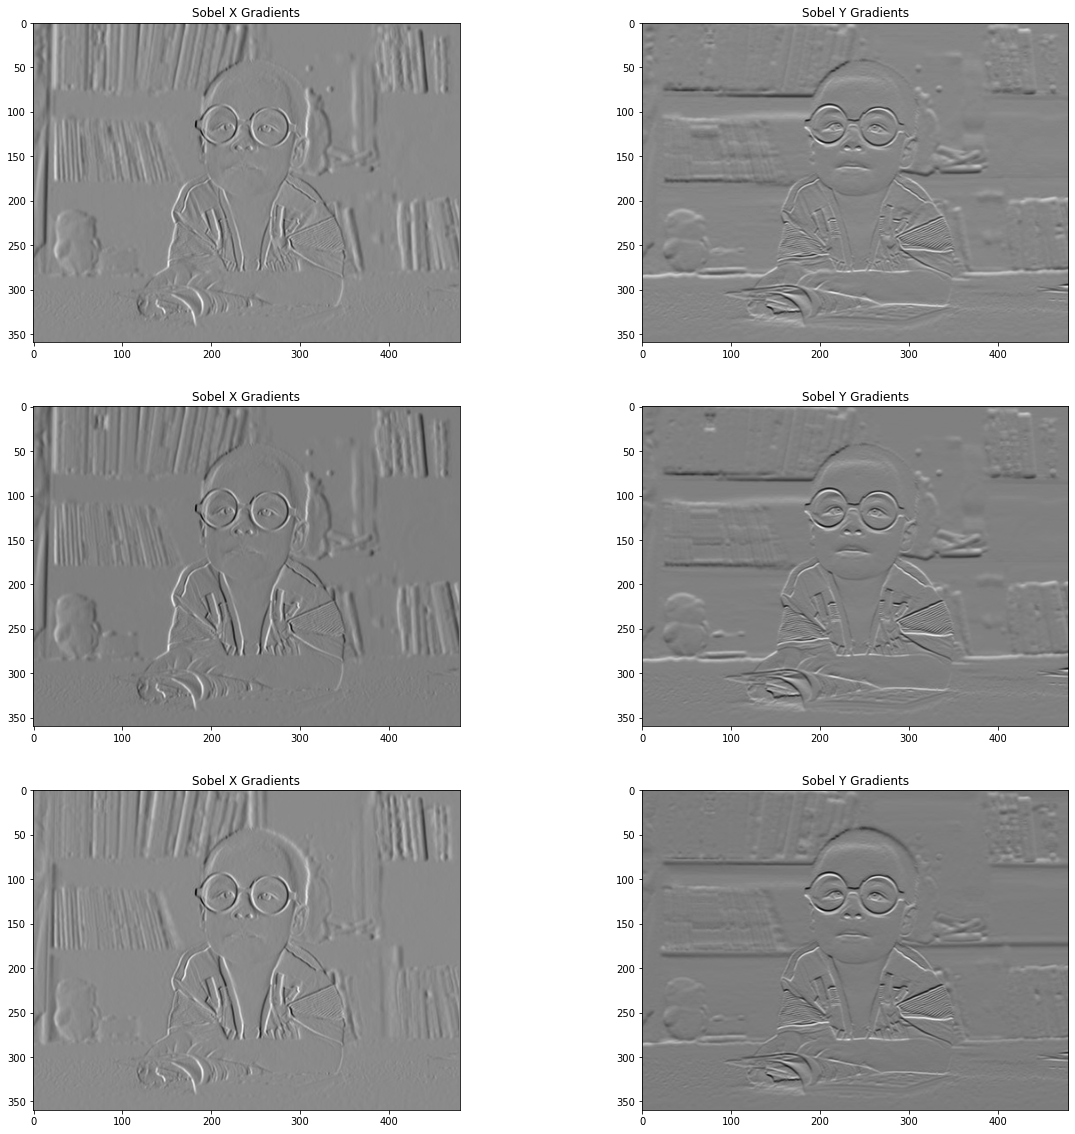

In [43]:
plt.figure(figsize=[20,20])

plt.subplot(321);plt.imshow(sobelx[:,:,0], cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(322);plt.imshow(sobely[:,:,0], cmap='gray');plt.title("Sobel Y Gradients")

plt.subplot(323);plt.imshow(sobelx[:,:,1], cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(324);plt.imshow(sobely[:,:,1], cmap='gray');plt.title("Sobel Y Gradients")

plt.subplot(325);plt.imshow(sobelx[:,:,2], cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(326);plt.imshow(sobely[:,:,2], cmap='gray');plt.title("Sobel Y Gradients")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sobel Y Gradients')

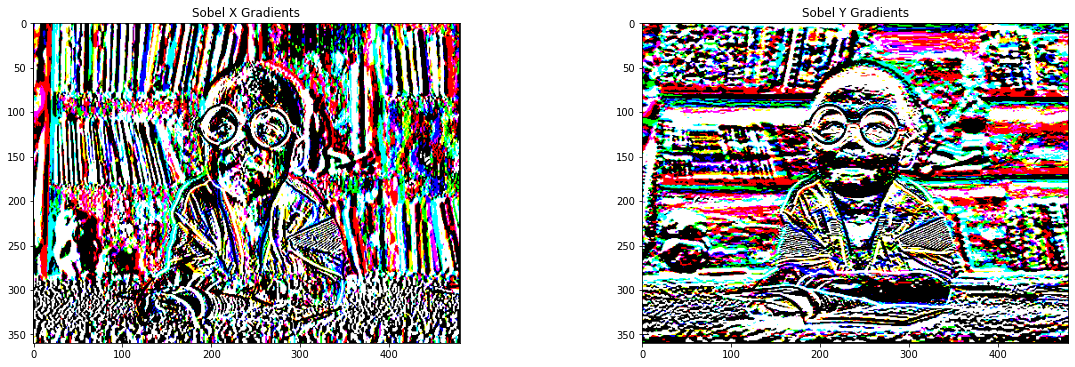

In [44]:
plt.figure(figsize=[20,20])

plt.subplot(321);plt.imshow(sobelx[:,:,::-1], cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(322);plt.imshow(sobely[:,:,::-1], cmap='gray');plt.title("Sobel Y Gradients")


In [47]:
print(sobelx.shape)
print(sobely.shape)

(360, 480, 3)
(360, 480, 3)


In [65]:
image[0:4, 0:4, 0]

array([[218, 216, 217, 220],
       [217, 215, 217, 221],
       [214, 215, 217, 221],
       [213, 214, 217, 221]], dtype=uint8)

In [64]:
(-1*218-2*217-1*214) + (1*217+2*217+1*217)

2

In [67]:
(-1*217-2*214-1*213) + (1*217+2*217+1*217)

10

In [66]:
sobelx[0:4, 0:4, 0]

array([[ 0., -2., 20., 42.],
       [ 0.,  2., 22., 45.],
       [ 0., 10., 25., 50.],
       [ 0., 15., 29., 55.]], dtype=float32)

In [70]:
(-1*218-2*216-1*217) + (1*214+2*215+1*217)

-6

In [69]:
sobely[0:4, 0:4, 0]

array([[  0.,   0.,   0.,   0.],
       [-10.,  -6.,   0.,   5.],
       [-10.,  -6.,  -1.,   2.],
       [ -8.,  -7.,  -3.,   3.]], dtype=float32)

In [50]:
magnitude = np.sqrt(sobelx**2 + sobely**2)

In [73]:
np.sqrt(2**2+(-6)**2)

6.324555320336759

In [68]:
magnitude[0:4, 0:4, 0]

array([[ 0.       ,  2.       , 20.       , 42.       ],
       [10.       ,  6.3245554, 22.       , 45.276924 ],
       [10.       , 11.661903 , 25.019993 , 50.039986 ],
       [ 8.       , 16.552946 , 29.15476  , 55.081757 ]], dtype=float32)

In [97]:
np.arctan2(-6, 2)

-1.2490457723982544

In [93]:
np.arctan2(-6, 2)*180/np.pi % 180

108.43494882292201

In [98]:
mag, angle = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)

In [99]:
mag[0:4, 0:4, 0]

array([[ 0.       ,  2.       , 20.       , 42.       ],
       [10.       ,  6.3245554, 22.       , 45.276928 ],
       [10.       , 11.661903 , 25.019993 , 50.039986 ],
       [ 8.       , 16.552946 , 29.154758 , 55.08176  ]], dtype=float32)

In [100]:
angle[0:4, 0:4, 0]

array([[  0.       , 180.       ,   0.       ,   0.       ],
       [270.       , 288.43866  ,   0.       ,   6.339391 ],
       [270.       , 329.03995  , 357.70984  ,   2.2901511],
       [270.       , 334.97977  , 354.09467  ,   3.1215363]],
      dtype=float32)

In [101]:
288 % 180

108

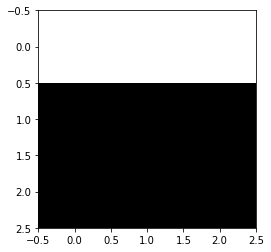

0 -1020
1020.0 [1020.]
90.0 [270.]


In [42]:
# array = np.array([[0, 0, 0],
#                  [0, 0, 0],
#                  [255, 255, 255]]).astype('uint8')

array = np.array([[255, 255, 255],
                 [0, 0, 0],
                 [0, 0, 0]]).astype('uint8')

# array = np.array([[255, 255, 255],
#                  [255, 0, 0],
#                  [255, 0, 0]]).astype('uint8')

# array = np.array([[0, 0, 255],
#                  [0, 0, 255],
#                  [255, 255, 255]]).astype('uint8')

# array = np.array([[255, 255, 255],
#                  [0, 0, 255],
#                  [0, 0, 255]]).astype('uint8')

# array = np.array([[255, 0, 0],
#                  [255, 0, 0],
#                  [255, 255, 255]]).astype('uint8')

plt.imshow(array, cmap='gray')
plt.show()

dx = ( (-1*array[0][0] + -2*array[1][0] + -1*array[2][0]) + (1*array[0][2] + 2*array[1][2] + 1*array[2][2]) )
dy = ( (-1*array[0][0] + -2*array[0][1] + -1*array[0][2]) + (1*array[2][0] + 2*array[2][1] + 1*array[2][2]) )

print(dx, dy)

mag = np.sqrt(dx**2 + dy**2)
angle = np.arctan2(dy, dx)*180/np.pi % 180

mag_f, angle_f = cv2.cartToPolar(np.float(dx), np.float(dy), angleInDegrees=True)

print(mag, mag_f[0])
print(angle, angle_f[0])

In [218]:
cv2.cartToPolar(1020, 0, angleInDegrees=True)

(array([[1020.],
        [   0.],
        [   0.],
        [   0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.]]))

In [3]:
race = cv2.imread('./data/images/race.jpg')

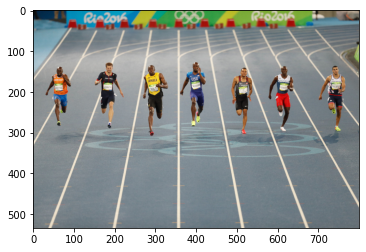

In [5]:
plt.imshow(race[:,:,::-1])
plt.show()

In [6]:
race.shape

(534, 800, 3)

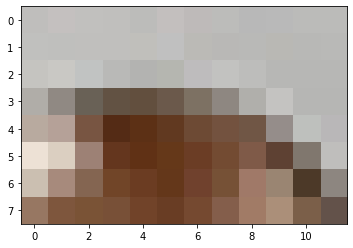

In [41]:
plt.imshow(race[132:140, 286:298][:,:,::-1])
plt.show()